# Exploratory Data Analysis on the products of an Online Retail Store
## Introduction
The following data set comes from a UK-based non-store online retailer that mainly sells gifts and household items, to primarily UK-based customers, The data set contains the sales, time, and geographical information of the individual purchases.

Our goal in this analysis is to identify trends in the sale of products to better understand customer purchasing behaviour, specifically analyzing patterns in revenue contribution per product. By uncovering which products drive the most revenue, this analysis will provide insights to improve demand forecasting, inventory management, and marketing strategies, ultimately leading to data-driven decisions that enhance supply chain efficiency.

## Business Questions
- Which products are the top sellers by revenue and by quantity sold?
- Which items have the most cancellations/returns?
- What are the peak sales months, days, and hours?
- Which countries have the most transactions?
- What percentage of the revenue do the top 20% of products contribute to?
- What percentage of the revenue do the top 20% of customers contribute to?
  
## Dataset
The following dataset is retrieved from the UCI Machine Learning Repository, which can be found at https://archive.ics.uci.edu/dataset/352/online+retail

---

## Preparing the Environment

We will be importing the following required libraries:
- Pandas - Data Manipulation
- Matplotlib and Seaborn - Data Visualization


In [1]:
# Import libraries and alias for easy reading
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
retail_store = pd.read_excel("Online_Retail.xlsx")

In [3]:
retail_store

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


From the tables, we can see that each row represents the order of an item and the corresponding quantity, price, and date that it was purchased. We also get some information on the country of the customer as well. 

Next, we can run df.shape and df.info() to get more information on the data.

In [4]:
retail_store.shape

(541909, 8)

In [5]:
retail_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


We see that there are 541909 rows including the header, and there are 8 columns. All the data types of the columns are correct and match the types of the corresponding values.

## Data Cleaning
Before analyzing the data, we have to clean the data first to ensure consistency amongst the data.
### Handling Missing Values
From the .info() table, we can tell that only Description and CustomerID contain null values.
We can keep the rows with missing CustomerIDs since our main focus is to analyze the inventory stock.

Let's analyze the columns with missing descriptions.

In [6]:
missing_desc = retail_store[retail_store["Description"].isna()]
missing_desc.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
2024,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
2025,536553,37461,NaN,3,2010-12-01 14:35:00,0.0,NaN,United Kingdom
2026,536554,84670,NaN,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom


One noticeable pattern in the entries with missing Descriptions is that the Unit Price these entries is 0.0. We can check if this pattern applies to all such entries.

In [7]:
missing_desc_unitprice = retail_store[retail_store["Description"].isna() & retail_store["UnitPrice"] != 0]
missing_desc_unitprice.shape

(0, 8)

We see all entries with empty descriptions also have empty Unit Prices. Therefore removing these entries will not affect the overall data.

In [8]:
# Remove all entries with no descriptions
retail_store = retail_store.dropna(subset=["Description"])

# Check to see all entries with no descriptions are deleted
print("Number of entries with empty descriptions:", retail_store["Description"].isna().sum())

Number of entries with empty descriptions: 0


Now, all the entries with empty descriptions are deleted.

Now let's take a look at the table again.

In [9]:
retail_store

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


**Duplicate Data**

We can now check if there is any duplicate data.

In [10]:
# Find the number of duplicate entries
num_duplicates = retail_store.duplicated().sum()
print("The number of duplicate rows:", num_duplicates)

The number of duplicate rows: 5268


We see that there are 5268 duplicated rows. Let's take a look at some of these duplicated rows.

In [11]:
retail_store[retail_store.duplicated(keep="last")].head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
548,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
556,536412,22273,FELTCRAFT DOLL MOLLY,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
565,536412,21448,12 DAISY PEGS IN WOOD BOX,2,2010-12-01 11:49:00,1.65,17920.0,United Kingdom
569,536412,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,1,2010-12-01 11:49:00,3.75,17920.0,United Kingdom
574,536412,22141,CHRISTMAS CRAFT TREE TOP ANGEL,1,2010-12-01 11:49:00,2.10,17920.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom


It seems that a lot of these rows with duplicated data share the same CustomerID. A potential reason for this would be lag, causing entries to submit multiple times.

We can now drop the duplicate rows using the drop_duplicates() function.

In [12]:
# Remove all duplicate entries
retail_store.drop_duplicates(inplace=True)
print("Number of duplicate entries:", retail_store.duplicated().sum())

Number of duplicate entries: 0


We can confirm that the duplicated rows have been successfully dropped from the table.

**Create New SKU Table**
We can create a new aggregated table that keeps track of SKU metrics. 
The table will keep track of the following metrics:
- StockCode
- Description
- Unit Price
- Total Quantity
- Total Revenue
- Number of Transactions
- Contribution Percentage


First we create the table and its schema.

In [13]:
# Create product table
sku_summary = (
    retail_store.groupby(["StockCode", "Description", "UnitPrice"]).agg(
        TotalQuantity=("Quantity", 'sum'),
        NumTransactions=("InvoiceNo", 'nunique')
    ).reset_index()
)

# Add TotalRevenue Column to Table
sku_summary["TotalRevenue"] = sku_summary["TotalQuantity"] * sku_summary["UnitPrice"]
sku_summary.head(10)

,StockCode,Description,UnitPrice,TotalQuantity,NumTransactions,TotalRevenue
0,10002,INFLATABLE POLITICAL GLOBE,0.85,824,50,700.40
1,10002,INFLATABLE POLITICAL GLOBE,1.63,9,7,14.67
2,10002,INFLATABLE POLITICAL GLOBE,1.66,27,14,44.82
3,10080,GROOVY CACTUS INFLATABLE,0.39,301,21,117.39
4,10080,GROOVY CACTUS INFLATABLE,0.85,2,1,1.70
5,10080,check,0.00,22,1,0.00
6,10120,DOGGY RUBBER,0.21,192,29,40.32
7,10125,MINI FUNKY DESIGN TAPES,0.42,260,10,109.20
8,10125,MINI FUNKY DESIGN TAPES,0.79,24,12,18.96
9,10125,MINI FUNKY DESIGN TAPES,0.81,36,10,29.16


We see there are inconsistencies within the data, as there should be only one row for every item. However, for most of the items, there are multiple rows, mainly due to different UnitPrices. This could be a result of price changes, whether it be a product going on sale or a customer having a discount code. 

We can solve this issue by merging the total revenues so each product has one total revenue, and then dividing it by the combined Total Quantity to get the Weighted Average Unit Price.

In [14]:
# Redefine the sku_summary table
sku_summary = (
    retail_store.groupby(['StockCode', 'Description'])
      .agg(
          TotalQuantity=('Quantity', 'sum'),
          WeightedAvgPrice=('UnitPrice', lambda x: (retail_store.loc[x.index, 'Quantity'] * x).sum() / retail_store.loc[x.index, 'Quantity'].sum()),
          NumTransactions=("InvoiceNo", 'nunique')
      )
      .reset_index()
)

sku_summary["TotalRevenue"] = sku_summary["TotalQuantity"] * sku_summary["WeightedAvgPrice"]
sku_summary.head(20)

,StockCode,Description,TotalQuantity,WeightedAvgPrice,NumTransactions,TotalRevenue
0,10002,INFLATABLE POLITICAL GLOBE,860,0.883593,71,759.89
1,10080,GROOVY CACTUS INFLATABLE,303,0.393036,22,119.09
2,10080,check,22,0.000000,1,0.00
3,10120,DOGGY RUBBER,192,0.210000,29,40.32
4,10125,MINI FUNKY DESIGN TAPES,1295,0.767560,91,993.99
5,10133,COLOURING PENCILS BROWN TUBE,2846,0.539494,197,1535.40
6,10133,damaged,-82,-0.000000,1,0.00
7,10135,COLOURING PENCILS BROWN TUBE,2228,0.989066,176,2203.64
8,11001,ASSTD DESIGN RACING CAR PEN,1430,1.505168,118,2152.39
9,15030,FAN BLACK FRAME,143,0.290000,12,41.47


We see that we still have some discrepancies in the data, namely the entries with descriptions like "check" and "damaged", where the revenue is equal to 0.

Let's take a look at some other products with no revenue.

In [15]:
sku_summary[sku_summary["TotalRevenue"] == 0]

,StockCode,Description,TotalQuantity,WeightedAvgPrice,NumTransactions,TotalRevenue
2,10080,check,22,0.0,1,0.0
6,10133,damaged,-82,-0.0,1,0.0
14,16008,check,-1510,-0.0,1,0.0
24,16045,check,-900,-0.0,1,0.0
55,20652,check,-37,-0.0,1,0.0
...,...,...,...,...,...,...
4771,DCGS0067,ebay,-11,-0.0,1,0.0
4772,DCGS0068,ebay,-10,-0.0,1,0.0
4774,DCGS0069,ebay,-5,-0.0,1,0.0
4776,DCGS0073,ebay,-4,-0.0,1,0.0


We see that all of the entries in the above table with a Total Revenue equal to 0 are not actual products. We can go ahead and remove these entries.

In [16]:
# list of products with no total revenue
no_rev = sku_summary["Description"][sku_summary["TotalRevenue"] == 0]
# remove the entries of the products with no total revenue
retail_store = retail_store[~retail_store["Description"].isin(no_rev)]
sku_summary = sku_summary[~sku_summary["Description"].isin(no_rev)]

We have now removed all such entries in both retail_store and sku_summary.

Let's take a final look at the sku_summary table.

In [17]:
sku_summary.head(20)

,StockCode,Description,TotalQuantity,WeightedAvgPrice,NumTransactions,TotalRevenue
0,10002,INFLATABLE POLITICAL GLOBE,860,0.883593,71,759.89
1,10080,GROOVY CACTUS INFLATABLE,303,0.393036,22,119.09
3,10120,DOGGY RUBBER,192,0.210000,29,40.32
4,10125,MINI FUNKY DESIGN TAPES,1295,0.767560,91,993.99
5,10133,COLOURING PENCILS BROWN TUBE,2846,0.539494,197,1535.40
7,10135,COLOURING PENCILS BROWN TUBE,2228,0.989066,176,2203.64
8,11001,ASSTD DESIGN RACING CAR PEN,1430,1.505168,118,2152.39
9,15030,FAN BLACK FRAME,143,0.290000,12,41.47
10,15034,PAPER POCKET TRAVELING FAN,5206,0.140555,142,731.73
11,15036,ASSORTED COLOURS SILK FAN,23082,0.782608,522,18064.16


## Descriptive Statistics

Here, we will do a descriptive statistical analysis. We use df.describe() and assign 'include = 'all' to ensure that categorical features are also included in the output.

In [18]:
retail_store.describe(include="all")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,534549.0,534549,534549,534549.000000,534549,534549.000000,401604.000000,534549
unique,23809.0,3938,4043,NaN,NaN,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114.0,2299,2357,NaN,NaN,NaN,NaN,488208
mean,NaN,NaN,NaN,9.940252,2011-07-04 10:20:34.533933824,4.650786,15281.160818,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 10:15:00,1.250000,13939.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 15:23:00,2.100000,15145.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-18 17:05:00,4.130000,16784.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


In [19]:
sku_summary.describe(include="all")


,StockCode,Description,TotalQuantity,WeightedAvgPrice,NumTransactions,TotalRevenue
count,4178.0,4178,4178.000000,4173.000000,4178.000000,4172.000000
unique,3938.0,4043,NaN,NaN,NaN,NaN
top,23196.0,"METAL SIGN,CUPCAKE SINGLE HOOK",NaN,NaN,NaN,NaN
freq,4.0,6,NaN,NaN,NaN,NaN
mean,NaN,NaN,1271.793202,inf,126.647918,2331.257467
std,NaN,NaN,2892.257463,NaN,190.935608,7754.484943
min,NaN,NaN,-1194.000000,-3687.353333,1.000000,-221520.500000
25%,NaN,NaN,45.000000,1.050000,13.000000,107.250000
50%,NaN,NaN,310.000000,2.025172,58.000000,602.210000
75%,NaN,NaN,1272.500000,4.107778,160.000000,2061.275000


One thing that stands out is that the minimum total revenue seems out of the ordinary. Let's take a look the products with the lowest revenue.

In [20]:
sku_summary.groupby("Description")["TotalRevenue"].sum().sort_values(ascending=True).head(10)

Description
AMAZON FEE                       -221520.500
Manual                            -69031.640
Adjust bad debt                   -11062.060
CRUK Commission                    -7933.430
Bank Charges                       -7175.639
Discount                           -5696.220
SAMPLES                            -3039.650
WHITE CHERRY LIGHTS                  -54.000
CREAM SWEETHEART MAGAZINE RACK       -46.850
WOODEN BOX ADVENT CALENDAR           -45.700
Name: TotalRevenue, dtype: float64

We see the first 7 entries in the table are not actually products, but rather other miscellaneous fees. As a result, they should be removed from the dataset.

In [21]:
# List of descriptions to remove
to_remove = [
    "AMAZON FEE",
    "Manual",
    "Adjust bad debt",
    "CRUK Commission",
    "Bank Charges",
    "Discount",
    "SAMPLES"
]
# remove entries with the specified descriptions in both tables
sku_summary = sku_summary[~sku_summary["Description"].isin(to_remove)]
retail_store = retail_store[~retail_store["Description"].isin(to_remove)]

sku_summary.groupby("Description")["TotalRevenue"].sum().sort_values(ascending=True).head(10)

Description
WHITE CHERRY LIGHTS               -54.00
CREAM SWEETHEART MAGAZINE RACK    -46.85
WOODEN BOX ADVENT CALENDAR        -45.70
ASSORTED TUTTI FRUTTI ROUND BOX   -39.60
PINK CHERRY LIGHTS                -27.00
BLUE PADDED SOFT MOBILE           -25.50
ANTIQUE LILY FAIRY LIGHTS         -14.85
CREAM SWEETHEART TRAYS            -12.75
TEA TIME CAKE STAND IN GIFT BOX   -10.75
CREAM SWEETHEART SHELF + HOOKS     -7.95
Name: TotalRevenue, dtype: float64

## Exploratory Data Analysis
### 1. Which products are the top sellers by revenue and by quantity sold?
We can take a look at the top 10 products sellers by revenue and by quantity sold.





In [22]:
product_revenue = (
    sku_summary.groupby("Description")["TotalRevenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
product_revenue

Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164459.49
WHITE HANGING HEART T-LIGHT HOLDER     99612.42
PARTY BUNTING                          98243.88
JUMBO BAG RED RETROSPOT                92175.79
RABBIT NIGHT LIGHT                     66661.63
POSTAGE                                66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         63715.24
ASSORTED COLOUR BIRD ORNAMENT          58792.42
CHILLI LIGHTS                          53746.66
Name: TotalRevenue, dtype: float64

Despite being in the top 10 products sold, DOTCOM POSTAGE and POSTAGE are not physical products, but they are service items, as they represent shipping/handling fees. Since they do not represent a part of the merchandise sales, they should be excluded from the list, however we should still keep in mind that they make up a nontrivial portion of total revenue.

In [23]:
product_revenue = (
    sku_summary[~sku_summary["Description"].isin(["DOTCOM POSTAGE", "POSTAGE"])]
    .groupby("Description")["TotalRevenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
product_revenue

Description
REGENCY CAKESTAND 3 TIER              164459.49
WHITE HANGING HEART T-LIGHT HOLDER     99612.42
PARTY BUNTING                          98243.88
JUMBO BAG RED RETROSPOT                92175.79
RABBIT NIGHT LIGHT                     66661.63
PAPER CHAIN KIT 50'S CHRISTMAS         63715.24
ASSORTED COLOUR BIRD ORNAMENT          58792.42
CHILLI LIGHTS                          53746.66
SPOTTY BUNTING                         42030.67
JUMBO BAG PINK POLKADOT                41584.43
Name: TotalRevenue, dtype: float64

We can also calculate the overall average of Total Revenue of all products, to see the difference between top earners and the average earners.

In [24]:
average_total_revenue = sku_summary.groupby("Description")["TotalRevenue"].sum().mean()
product_revenue["Average Total Revenue"] = round(average_total_revenue, 2)
product_revenue

Description
REGENCY CAKESTAND 3 TIER              164459.49
WHITE HANGING HEART T-LIGHT HOLDER     99612.42
PARTY BUNTING                          98243.88
JUMBO BAG RED RETROSPOT                92175.79
RABBIT NIGHT LIGHT                     66661.63
PAPER CHAIN KIT 50'S CHRISTMAS         63715.24
ASSORTED COLOUR BIRD ORNAMENT          58792.42
CHILLI LIGHTS                          53746.66
SPOTTY BUNTING                         42030.67
JUMBO BAG PINK POLKADOT                41584.43
Average Total Revenue                   2490.45
Name: TotalRevenue, dtype: float64

Now we can plot the graph

<Axes: ylabel='Description'>

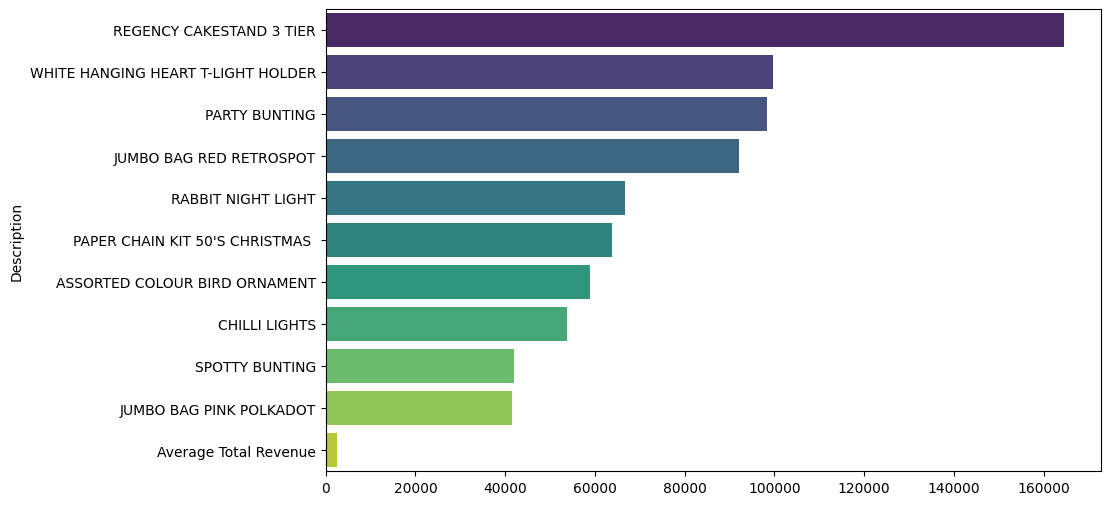

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=product_revenue.values,
    y=product_revenue.index,
    palette="viridis"
)

In [26]:
product_quantity = (
    sku_summary.groupby("Description")["TotalQuantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
product_quantity

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53751
JUMBO BAG RED RETROSPOT               47260
POPCORN HOLDER                        36322
ASSORTED COLOUR BIRD ORNAMENT         36282
PACK OF 72 RETROSPOT CAKE CASES       36016
WHITE HANGING HEART T-LIGHT HOLDER    35298
RABBIT NIGHT LIGHT                    30631
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26299
PACK OF 60 PINK PAISLEY CAKE CASES    24719
Name: TotalQuantity, dtype: int64

Again, we can add the average number of all products sold.

In [27]:
average_total_quantity = sku_summary.groupby("Description")["TotalQuantity"].sum().mean()
product_quantity["Average Total Quantity"] = int(average_total_revenue)
product_quantity

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53751
JUMBO BAG RED RETROSPOT               47260
POPCORN HOLDER                        36322
ASSORTED COLOUR BIRD ORNAMENT         36282
PACK OF 72 RETROSPOT CAKE CASES       36016
WHITE HANGING HEART T-LIGHT HOLDER    35298
RABBIT NIGHT LIGHT                    30631
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26299
PACK OF 60 PINK PAISLEY CAKE CASES    24719
Average Total Quantity                 2490
Name: TotalQuantity, dtype: int64

<Axes: ylabel='Description'>

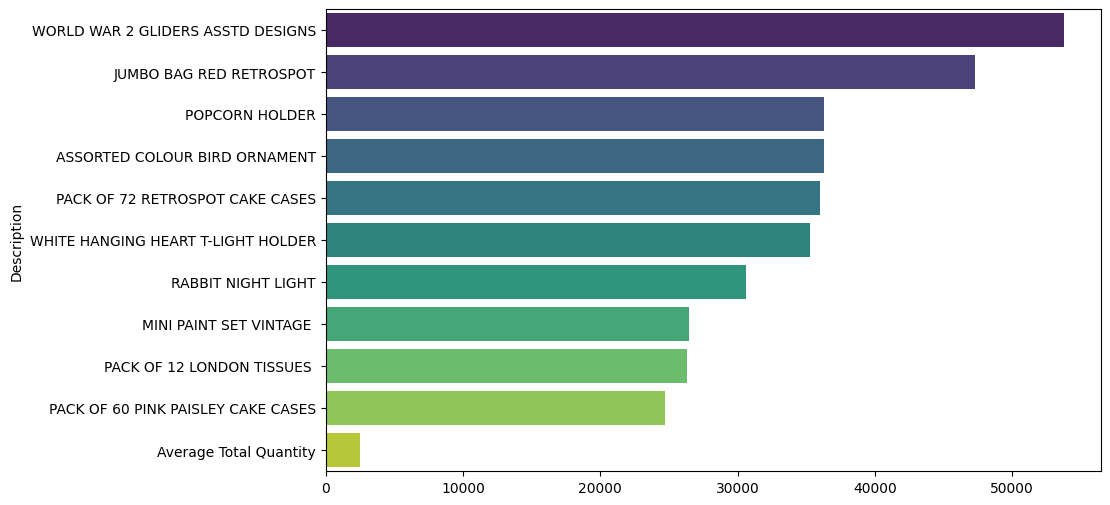

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=product_quantity.values,
    y=product_quantity.index,
    palette="viridis"
)

From the data, we can see that the top sellers in both revenue and quantity are way above the average. There are also a couple products that are in both tables, as they are both a best seller in terms of revenue and quantity.

### 2. Which items have the most cancellations/returns?
In the dataset, returns and cancellations are identified by either:
- The invoice code starts with a 'c'
- Negative Quantity Values


In [29]:
returns = retail_store[retail_store["Quantity"] < 0]

product_returns = (
    returns.groupby("Description")["Quantity"]
    .count()
    .sort_values(ascending=False)
    .head(10)
)


print("Top 10 Products with Most Cancellations or Returns:")
print(product_returns)

Top 10 Products with Most Cancellations or Returns:
Description
REGENCY CAKESTAND 3 TIER              180
POSTAGE                               126
JAM MAKING SET WITH JARS               87
SET OF 3 CAKE TINS PANTRY DESIGN       73
ROSES REGENCY TEACUP AND SAUCER        54
STRAWBERRY CERAMIC TRINKET BOX         54
RECIPE BOX PANTRY YELLOW DESIGN        47
LUNCH BAG RED RETROSPOT                44
JUMBO BAG RED RETROSPOT                44
WHITE HANGING HEART T-LIGHT HOLDER     42
Name: Quantity, dtype: int64


We can also find out total quantity sold of these products.

In [30]:
top_returned_products = product_returns.index
top_returned_quantity = sku_summary[sku_summary["Description"].isin(top_returned_products)]
top_returned_quantity

,StockCode,Description,TotalQuantity,WeightedAvgPrice,NumTransactions,TotalRevenue
120,20725,LUNCH BAG RED RETROSPOT,18658,1.860739,1607,34717.66
455,21232,STRAWBERRY CERAMIC TRINKET BOX,10112,1.355131,758,13703.08
1464,22423,REGENCY CAKESTAND 3 TIER,13007,12.643922,2169,164459.49
1738,22666,RECIPE BOX PANTRY YELLOW DESIGN,8139,3.169787,1164,25798.90
1775,22699,ROSES REGENCY TEACUP AND SAUCER,9428,2.959967,1120,27906.57
1800,22720,SET OF 3 CAKE TINS PANTRY DESIGN,7329,5.100121,1458,37378.79
2091,22960,JAM MAKING SET WITH JARS,8459,4.264019,1220,36069.34
4360,85099B,JUMBO BAG RED RETROSPOT,47260,1.950398,2135,92175.79
4373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,35006,2.789806,2235,97659.94
4375,85123a,WHITE HANGING HEART T-LIGHT HOLDER,292,6.686575,67,1952.48


We can plot the above information out on a bar graph.

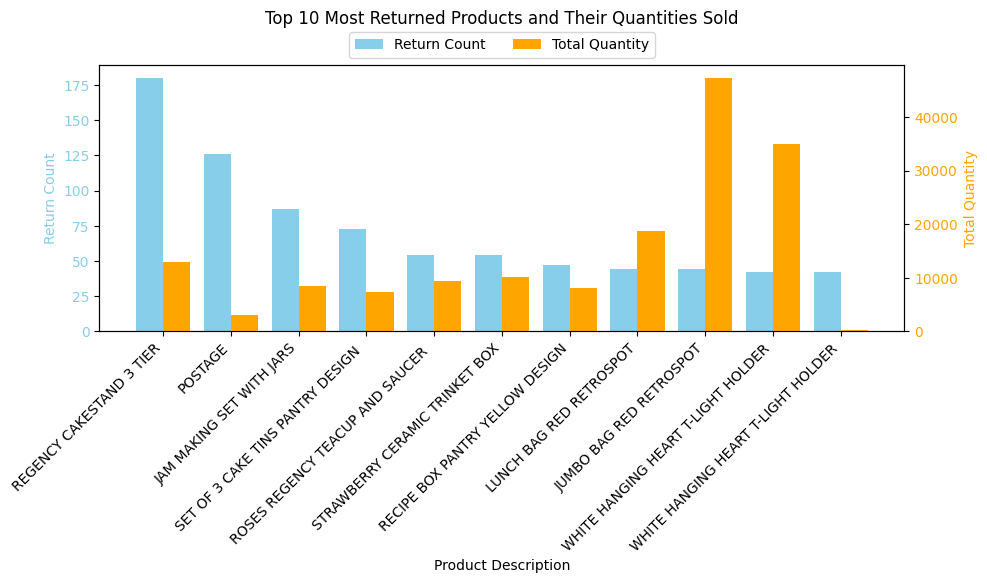

In [31]:
plot_df = top_returned_quantity.set_index("Description").loc[top_returned_products][["TotalQuantity"]]
plot_df["ReturnCount"] = product_returns

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

x = range(len(plot_df))
width = 0.4

# Bar chart for Return Count 
ax1.bar(
    [pos - width/2 for pos in x],
    plot_df["ReturnCount"],
    width=width,
    color="skyblue",
    label="Return Count"
)
ax1.set_xlabel("Product Description")
ax1.set_ylabel("Return Count", color="skyblue")
ax1.tick_params(axis="y", labelcolor="skyblue")

# Bar chart for Total Revenue 
ax2 = ax1.twinx()
ax2.bar(
    [pos + width/2 for pos in x],
    plot_df["TotalQuantity"],
    width=width,
    color="orange",
    label="Total Quantity"
)
ax2.set_ylabel("Total Quantity", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

# X-axis labels
ax1.set_xticks(list(x))
ax1.set_xticklabels(plot_df.index, rotation=45, ha="right")

plt.title("Top 10 Most Returned Products and Their Quantities Sold", pad=30)

# Combine legends from both axes

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

ax1.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc="upper center",
    bbox_to_anchor=(0.5, 1.15),
    ncol=2
)
plt.tight_layout()
plt.show()


From this graph, we can directly compare the return count vs the total quantity sold of the most returned products

### 3. What are the peak sales months, days, and hours?

In [32]:
retail_store = retail_store.dropna(subset=["InvoiceDate", "CustomerID", "Description"])
retail_store = retail_store[retail_store["Quantity"] > 0]

# Create a revenue column
retail_store["Revenue"] = retail_store["Quantity"] * retail_store["UnitPrice"]

# Extract time features
retail_store["Month"] = retail_store["InvoiceDate"].dt.month
retail_store["DayOfWeek"] = retail_store["InvoiceDate"].dt.day_name()
retail_store["Hour"] = retail_store["InvoiceDate"].dt.hour

monthly_sales = (
    retail_store.groupby("Month")["Revenue"].sum().reset_index()
)
monthly_sales

,Month,Revenue
0,1,567991.910
1,2,445659.590
2,3,589168.850
3,4,458250.831
4,5,673037.240
5,6,659274.940
6,7,597415.131
7,8,641061.500
8,9,947228.961
9,10,1014428.820


In [33]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_sales = (
    retail_store.groupby("DayOfWeek")["Revenue"]
    .sum()
    .reindex(day_order)
    .reset_index()
)
daily_sales

,DayOfWeek,Revenue
0,Monday,1346659.670
1,Tuesday,1691218.071
2,Wednesday,1577015.310
3,Thursday,1957254.570
4,Friday,1476193.641
5,Saturday,NaN
6,Sunday,785282.701


In [34]:
hourly_sales = (
    retail_store.groupby("Hour")["Revenue"].sum().reset_index()
)
hourly_sales

,Hour,Revenue
0,6,4.250
1,7,31059.210
2,8,281997.790
3,9,838432.791
4,10,1253617.591
5,11,1091926.510
6,12,1372514.500
7,13,1159378.580
8,14,978305.561
9,15,958738.390


We can plot the data

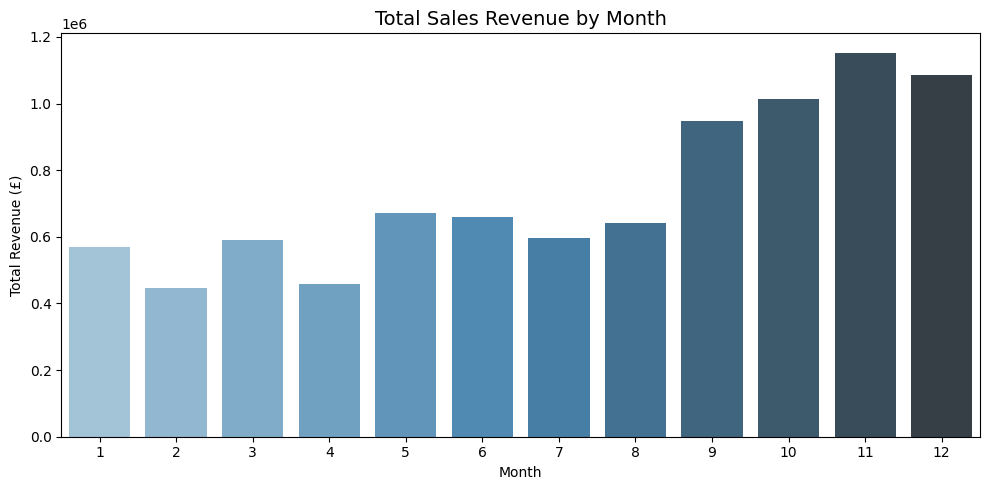

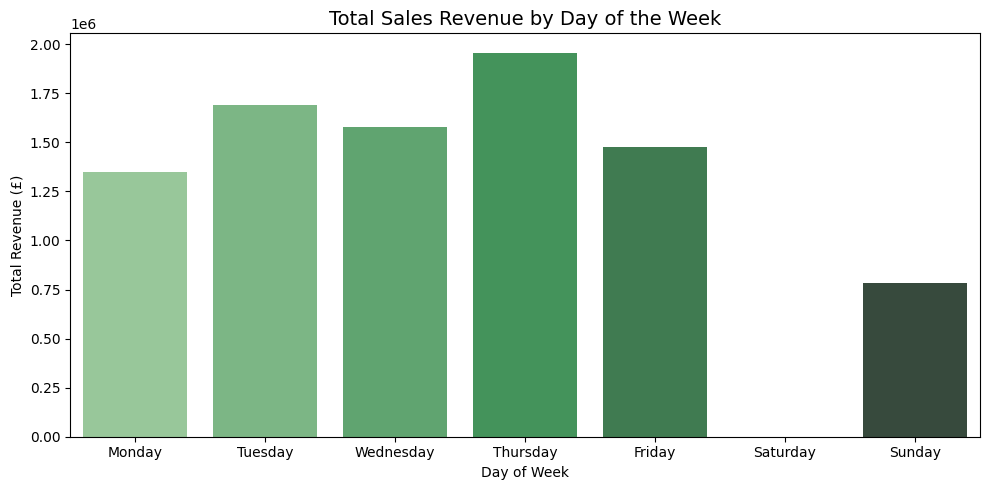

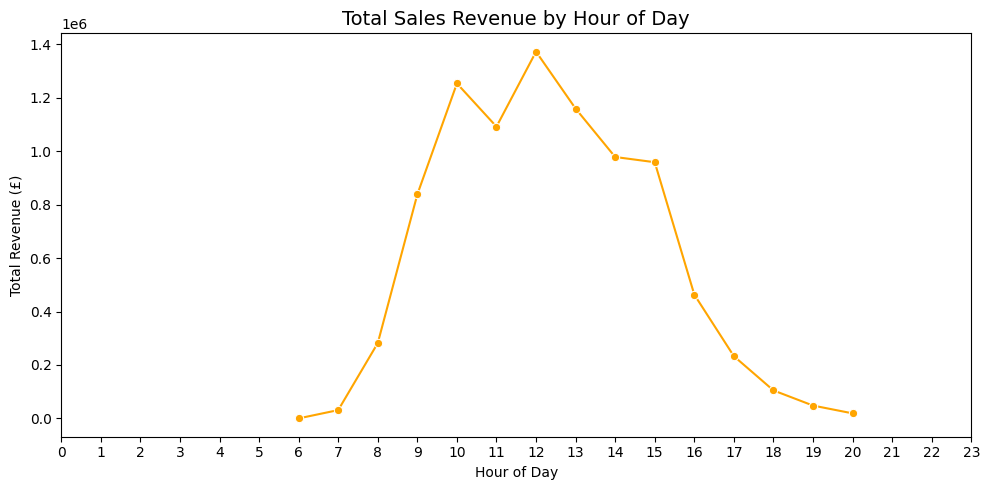

In [35]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Month", y="Revenue", data=monthly_sales, palette="Blues_d")
plt.title("Total Sales Revenue by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Revenue (£)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x="DayOfWeek", y="Revenue", data=daily_sales, palette="Greens_d")
plt.title("Total Sales Revenue by Day of the Week", fontsize=14)
plt.xlabel("Day of Week")
plt.ylabel("Total Revenue (£)")
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
sns.lineplot(x="Hour", y="Revenue", data=hourly_sales, marker="o", color="orange")
plt.title("Total Sales Revenue by Hour of Day", fontsize=14)
plt.xlabel("Hour of Day")
plt.ylabel("Total Revenue (£)")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

From the graphs, we see there is an increase in purchases in the later months, an increase of purchase on the weekdays with no sales on Saturdays, and a time period of purchases from 6 am to 8 pm, with a spike of purchases hapening midday at around noon.

This data leads us to conclude that the main customers are businesses, as most of the orders seem to be during the middle of the day on weekdays, which is during typical working hours. From the increase in orders in the later months, a conclusion that can be drawn is that customers may tend to order more products during the holiday season.

### 4. Which countries have the most transactions?

In [36]:
transactions_per_country = (
    retail_store.groupby("Country")["InvoiceNo"]
    .nunique()  # counts unique transactions
    .sort_values(ascending=False)
    .reset_index()
)

transactions_per_country.head(10)

,Country,InvoiceNo
0,United Kingdom,16598
1,Germany,451
2,France,385
3,EIRE,258
4,Belgium,98
5,Netherlands,95
6,Spain,90
7,Australia,57
8,Switzerland,51
9,Portugal,51


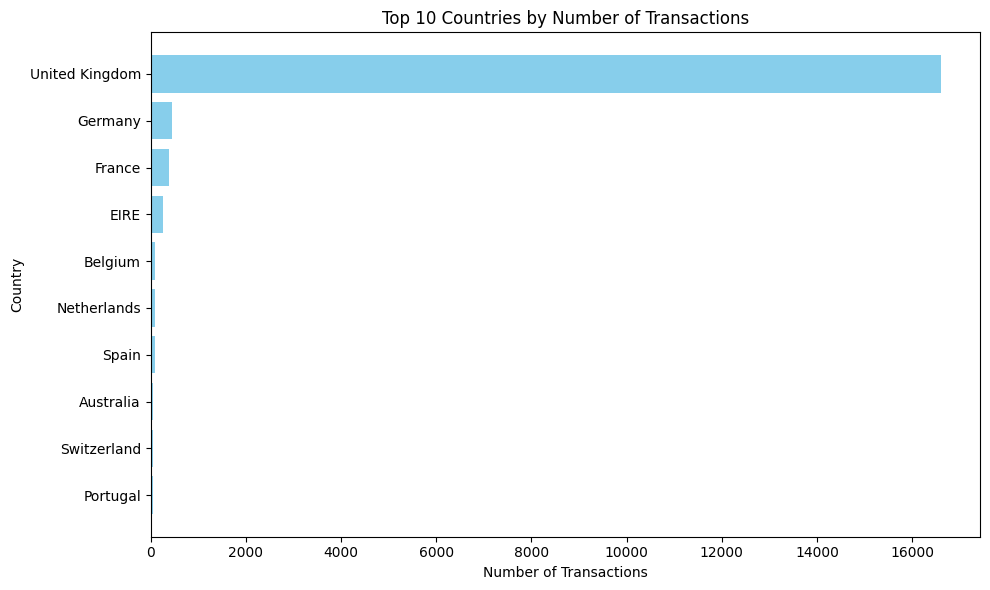

In [37]:
top_countries = transactions_per_country.head(10)

plt.figure(figsize=(10,6))
plt.barh(top_countries["Country"], top_countries["InvoiceNo"], color="skyblue")
plt.xlabel("Number of Transactions")
plt.ylabel("Country")
plt.title("Top 10 Countries by Number of Transactions")
plt.gca().invert_yaxis()  # largest on top
plt.tight_layout()
plt.show()

We can use a graph to visualize this data.

From the data, we can see that a vast majority of the customers are from the United Kingdom, but there are also a substantial portion of customers from various European countries. 

### 5. What percentage of the revenue do the top 20% of products contribute to?


In [38]:
retail_store["Revenue"] = retail_store["Quantity"] * retail_store["UnitPrice"]

# Aggregate revenue by product
product_revenue = (
    retail_store.groupby("Description")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
# Sort by revenue descending
product_revenue["CumulativeRevenue"] = product_revenue["Revenue"].cumsum()

# Compute total revenue
total_revenue = product_revenue["Revenue"].sum()

# Compute cumulative percentage of total revenue
product_revenue["CumulativePerc"] = product_revenue["CumulativeRevenue"] / total_revenue * 100

# Find the number of products that make up the top 20%
top_20_cutoff = int(len(product_revenue) * 0.2)

# Measure the percentage of revenue contributed by top 20% products
top_20_products = product_revenue.head(top_20_cutoff)
top_20_revenue_share = top_20_products["Revenue"].sum() / total_revenue * 100

print(f"Top 20% of products contribute {top_20_revenue_share:.2f}% of total revenue.")

Top 20% of products contribute 78.89% of total revenue.


### 6. What percentage of the revenue do the top 20% of customers contribute to?


In [39]:
# Determine the revenue per customer
revenue_per_customer = (
    retail_store.assign(Revenue = retail_store["Quantity"] * retail_store["UnitPrice"])
    .groupby("CustomerID")["Revenue"]
    .sum()
    .sort_values(ascending=False)
)
# Find the top 20% of customers
top_10_percent_count = int(0.2 * len(revenue_per_customer))
top_customers = revenue_per_customer.head(top_10_percent_count)

# Calculate their percentage contribution
total_revenue = revenue_per_customer.sum()
top_revenue = top_customers.sum()
top_20_percent_contribution = (top_revenue / total_revenue) * 100
print(f"The top 20% of customers contribute {top_20_percent_contribution:.2f}% of total revenue.")

The top 20% of customers contribute 74.61% of total revenue.


--- 
## Strategic Recommendations

Here we revisit our business questions and share our high-level business recommendations

### Business Questions

- Which products are the top sellers by revenue and by quantity sold?
- Which items have the most cancellations/returns?
- What are the peak sales months, days, and hours?
- Which countries have the most transactions?
- What percentage of the revenue do the top 20% of products contribute to?
- What percentage of the revenue do the top 20% of customers contribute to?

### Insights

**Product Revenue**

From finding the top selling products by revenue, we see the top products generate a lot more revenue than the average product
Adding on to the fact that the top 20% of products make up almost 80% of the revenue, it further emphasizes that our sales are concentrated among a few top products. 
There also seems to be a large variety of products, with around 4000 unique products, but many of them have low revenue, which may incur in negative profit if we account for the costs.  A suggestion cut down on the bottom 40-50% of the low earning SKUs, which may not hurt revenue much, while improving efficiency and lowering storage and operational costs.

From finding the items with most cancellation/returns compared to their number of sales, like the 'White Hanging Heart T-Light Holder', we can identify products with issues. Whether it being product quality issues, misleading representation, or shipping issues that cause them to damage during delivery, we can take a deeper look in these products to figure out their issues, while simultaneously reducing return costs and customer dissatisfaction.

**Customers**

From the graphs displaying the total revenue by month, day, and hour, there are several conclusions we can come to:
- The increase in purchases in the later months of the year potentially signify an increase of interest in the holiday season, where customers are buying holiday decorations or gifts.
- The increase in purchases on weekdays and compared to no purchases on Saturday and low purchases on Sunday, combined with the fact that the majority purchases are done during typical working hours signify that the majority of customers not individuals, but rather by people during working hours.
- We also know that top 20% of customers contribute to almost 75% of total revenue, which could potentially suggest that these customers are often repeat purchasers or they order in bulk.

Also, we notice there are a small portion of customers from various European countries, which could be the primary location for expansion.

---